# Movie Correlation Project
Goal: Find which movie attributes are most correlated with their gross earnings using data visualization in python.

Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download


In [1]:
# Import Libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# read data
data = pd.read_csv(r'Downloads\movies.csv')

In [2]:
# Inspect data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

#### Drop Rows With Null Values

In [3]:
# Checking for null values
  
for col in data.columns:
    num_missing = np.count_nonzero(data[col].isnull())
    print('{} - {}'.format(col, num_missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [4]:
# Count the number of rows with any null values
x = len(data) - len(data.dropna())

#If we want to inspect the rows with a null value in a given column.
#data[data['budget'].isnull()].sort_values(by=['name'], ascending=False)

# Drop rows with any null values
data = data.dropna()

print(x, "rows dropped.")

2247 rows dropped.


#### Change Data Types

In [5]:
# Checking data types of columns

data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Change 'budget', 'gross', 'votes', and 'runtime' data type from float to integer for aesthetic purposes and for later analysis.
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
data['votes'] = data['votes'].astype('int64')
data['runtime'] = data['runtime'].astype('int64')
data['year'] = data['year'].astype('int64')

#### Remove Duplicate Rows

In [7]:
# Count the number of duplicate rows
x = len(data) - len(data.drop_duplicates())

# Drop rows with duplicate values
data = data.drop_duplicates()

print(x, "duplicate rows removed.")

0 duplicate rows removed.


#### Check Data For Consistency

In [8]:
# Change the size of cells with scrolling outputs
from IPython.core.display import display, HTML
display(HTML("<style>.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea { max-height: 22em; }</style>"))

# Remove the limit on output size so we can see all the data
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Sort the data by gross revenue.
data = data.sort_values(by=['gross'], inplace=False, ascending=False)

# Inspect our complete dataset.
# data

In [9]:
# 'Year' column is sometimes inconsistent with year from 'released' year, add column for correct year released

def get_year(s):
    return [x for x in s.split() if x.isdigit()][-1]

data['yearcorrect'] = data['released'].astype(str).apply(get_year).astype('int64')

#data['yearcorrect'].drop_duplicates().sort_values(ascending=False)

In [16]:
# Take a final look at our data before analysis.
# data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## Analysis
Which movie attributes are most correlated with gross revenue?

In [11]:
# Use ggplot style plots
plt.style.use('ggplot')

# Show plots in notebook
%matplotlib inline

# Adjust the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12,8)

#### Budget
We will first take a look at budget, since this seems the most likely to be correlated with gross revenue.

##### Scatter Plot Using Matplotlib

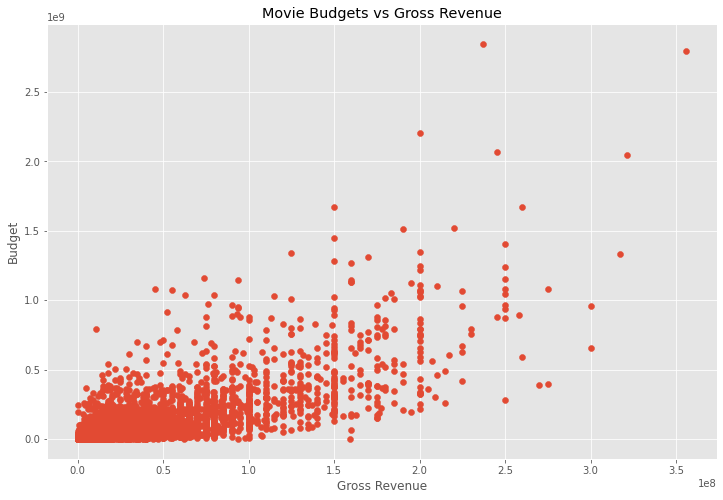

In [12]:
plt.scatter(x=data['budget'], y=data['gross'])
plt.title('Movie Budgets vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')

plt.show()

##### Regression Plot Using Seaborn

<AxesSubplot:xlabel='budget', ylabel='gross'>

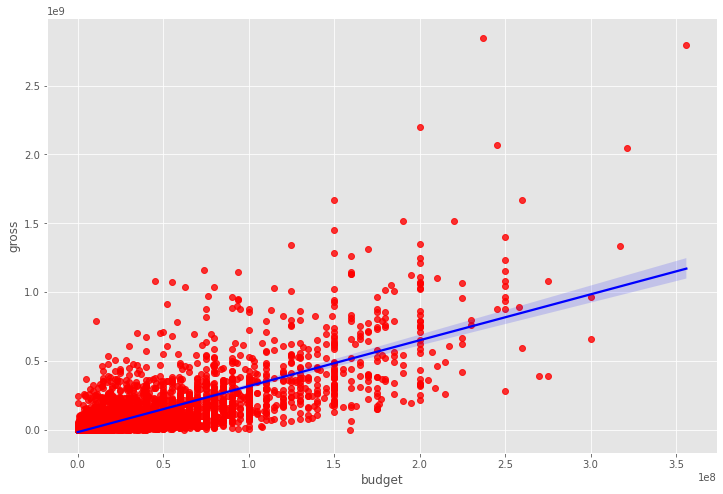

In [13]:
sb.regplot(x='budget', y='gross', data=data, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

As expected, there is a strong correlation between budget and gross revenue.

#### Other Attributes
Now let's look at the correlation between all attributes and gross revenue. For the purpose of this analysis, only numeric attributes are considered.

##### Correlation Matrix

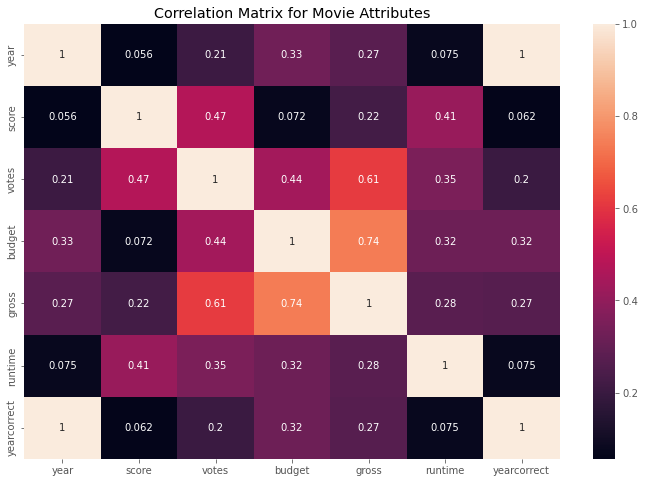

In [14]:
correlation_matrix = data.corr(method='pearson') # Alternative methods are kendall, spearman
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movie Attributes')
plt.show()

Budget has the strongest correlation with gross revenue, with number of user votes on IMDB also having a moderate correlation.

##### Correlation Pairs
Another Way of Looking at Correlation

In [28]:
corr_pairs = correlation_matrix.unstack().sort_values(ascending = False)
corr_pairs['gross']

gross          1.000000
budget         0.740247
votes          0.614751
runtime        0.275796
year           0.274321
yearcorrect    0.268721
score          0.222556
dtype: float64

### Conclusion
A movie's gross revenue has a strong correlation with its budget.

A movie's gross revenue has a moderate correlation with its number of user votes on IMDB.

A movie's gross revenue has a low correlation with its runtime, yeare, and user score on IMDB.